<a href="https://colab.research.google.com/github/pmehta2612/Zomato-EDA-Project/blob/main/Zomato_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato EDA Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

With the quick expansion of the Indian restaurant and food industry, understanding customer trends, restaurant performance, and market trends has become more important. The goal of this project is to analyze Zomato restaurant data using Exploratory Data Analysis (EDA) techniques. The vision is to detect trends in restaurant profiles, customer reviews, and local food trends in India. The project also includes clustering restaurants according to similarity so that consumer choice and the market segments are more clearly understood, and that ultimately assists customer decision-making and business strategy.

# **GitHub Link -**

[Zomato EDA Project](https://github.com/pmehta2612/Zomato-EDA-Project/blob/main/Zomato_EDA_Project.ipynb)

# **Problem Statement**


With the fast expansion of the restaurant and food delivery industry in India, portals such as Zomato gather lots of information regarding restaurants and customer choices. But alone, data does not get utilized. The challenge lies in searching and examining the data to derive meaningful insights into restaurant performance, customer reviews, price dynamics, and popularity of dishes. By applying Exploratory Data Analysis (EDA) and proper visualization, we hope to find important patterns and categorize restaurants according to these patterns so that businesses can make proper choices and enhance customer satisfaction.

#### **Define Your Business Objective?**

1. **Understand Customer Preferences:**

Understand customer review and rating patterns to establish sentiment trends, satisfaction levels, and expectation towards various types of restaurants.

2. **Identify Popular Cuisines and Dining Trends:**

Identify the most requested cuisines, price points, and meal times in metropolitan cities to enable restaurants to match their offerings with customer preference.

3. **Segment Restaurants into Clusters:**

Cluster restaurants by common characteristics like price, cuisine type, and user sentiment to facilitate targeted marketing and operations strategies.

4. **Facilitate Smarter Business Decision-Making:**

Enable restaurant businesses and food delivery companies to make informed decisions with data-driven insights on optimally priced items, increasing service levels, and customer retention.

5. **Enhance Customer Experience:**

Allow Zomato and partner restaurants to gain a deeper understanding of user behavior and provide improved personalization and improved dining suggestions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
restname_path = '/content/drive/MyDrive/Labmentix_Internship_Projects/Zomato_EDA_Project/Zomato Restaurant names and Metadata.csv'  # File path for restaurant names
reviews_path = '/content/drive/MyDrive/Labmentix_Internship_Projects/Zomato_EDA_Project/Zomato Restaurant reviews.csv' # File path for restaurant reviews
# Load the df using the load_csv function
restaurant_names_df = load_csv(file_path=restname_path)  # Load restaurant names df
restaurant_reviews_df = load_csv(file_path=reviews_path)  # Load restaurant reviews df
# Display all columns
pd.set_option('display.max_columns', None)


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
# Dataset-1
restaurant_names_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
# Dataset-2
restaurant_reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
# Dataset-1
print("Restaurant Names- ")
print(f"Number of Rows: {restaurant_names_df.shape[0]}")
print(f"Number of Columns: {restaurant_names_df.shape[1]}")
# Dataset-2
print("\nRestaurant Reviews- ")
print(f"Number of Rows: {restaurant_reviews_df.shape[0]}")
print(f"Number of Columns: {restaurant_reviews_df.shape[1]}")

Restaurant Names- 
Number of Rows: 105
Number of Columns: 6

Restaurant Reviews- 
Number of Rows: 10000
Number of Columns: 7


### Dataset Information

In [6]:
# Dataset Info
print("Restaurant Names- ")
restaurant_names_df.info()
print("\nRestaurant Reviews- ")
restaurant_reviews_df.info()

Restaurant Names- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

Restaurant Reviews- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), ob

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# Dataset-1
print("Restaurant Names- ")
print(f"Number of Duplicate Rows: {restaurant_names_df.duplicated().sum()}")
# Dataset-2
print("\nRestaurant Reviews- ")
print(f"Number of Duplicate Rows: {restaurant_reviews_df.duplicated().sum()}")

Restaurant Names- 
Number of Duplicate Rows: 0

Restaurant Reviews- 
Number of Duplicate Rows: 36


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# Dataset-1
print("Restaurant Names- ")
print(restaurant_names_df.isnull().sum())
# Dataset-2
print("\nRestaurant Reviews- ")
print(restaurant_reviews_df.isnull().sum())

Restaurant Names- 
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Restaurant Reviews- 
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


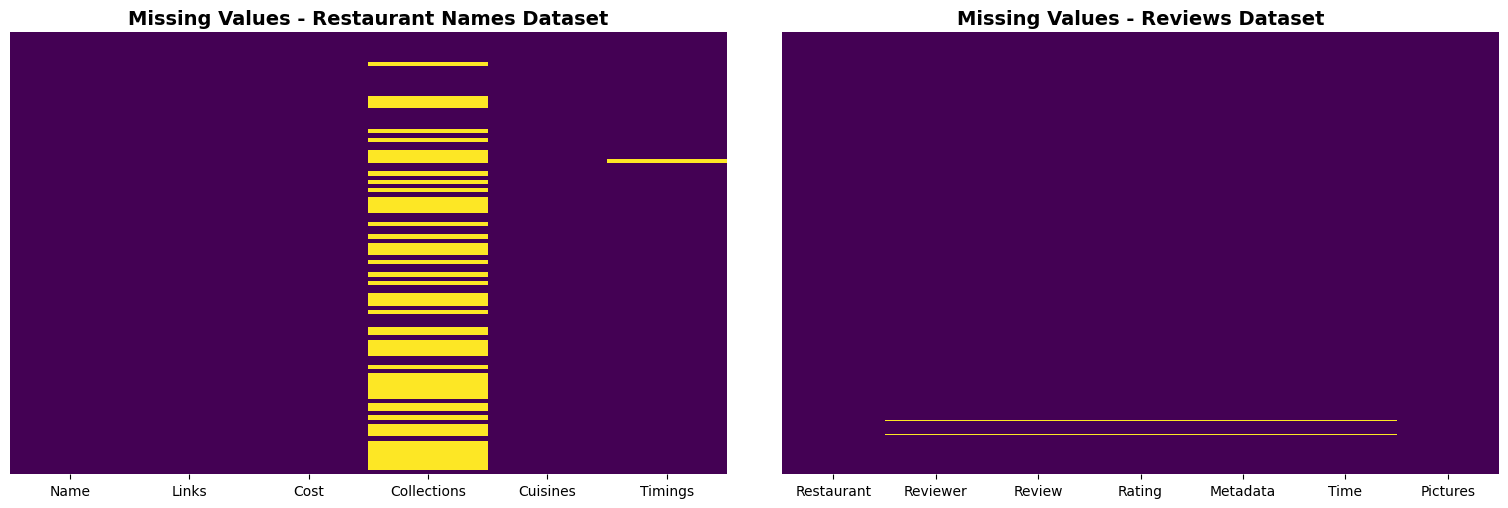

In [9]:
# Visualizing the missing values
# Set up the figure and subplots
plt.figure(figsize=(16, 6))  # Wider width for side-by-side plots
# Plot heatmap for Restaurant names dataset
plt.subplot(1, 2, 1)
sns.heatmap(restaurant_names_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values - Restaurant Names Dataset', fontsize = 14, fontweight = 'bold')

# Plot heatmap for Reviews dataset
plt.subplot(1, 2, 2)
sns.heatmap(restaurant_reviews_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values - Reviews Dataset', fontsize = 14, fontweight = 'bold')

# Add space between plots
plt.tight_layout(pad=4)

# Show plot
plt.show()



### What did you know about your dataset?

#### **Dataset-1 Restaurant Names and Metadata**
The initial data set contains fundamental details of restaurants listed on Zomato. The data set contains 105 rows and 6 columns, which is highly compact and easy to investigate at the first level. There are no duplicate values in the data set, which maintains data quality and integrity for future intentions.

At the time of checking the data, there are two columns containing missing values:

* **Collections:** 54 missing values
* **Timings:** 1 missing value

These missing values will have to be taken care of at the data cleaning stage, in particular as the "Collections" column has more than 50% missing data, which can make it less useful. Overall, this dataset contains valuable metadata such as restaurant names, location, and timings, which are useful for segmentation and categorization.


---


#### **Dataset-2 Restaurant Reviews**
The second data set is big and has 10,000 rows and 7 columns and is rich with customer-generated content in the form of reviews, ratings, and metadata. But it was seen that the data set has 36 duplicate rows, which should be dropped so that the analysis does not become biased.

There are also null or missing values in certain columns:

* **Reviewer:** 38 missing values
* **Review:** 45 missing values
* **Rating:** 38 missing values
* **Metadata:** 38 missing values
* **Time:** 38 missing values

Missing values, though few as they are not excessive compared to the overall size of the data set, need to be treated with care in a bid to preserve data integrity—particularly since review and rating columns are vital to sentiment analysis and clustering. Regardless, the data set offers useful information regarding customer opinions and behavior for which reason user sentiment and user preferences acquisition are important.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
# Dataset-1
print("Restaurant Names- ")
print(restaurant_names_df.columns)
# Dataset-2
print("\nRestaurant Reviews- ")
print(restaurant_reviews_df.columns)

Restaurant Names- 
Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

Restaurant Reviews- 
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [11]:
# Dataset Describe
# Dataset-1
print("Restaurant Names- ")
print(restaurant_names_df.describe())
# Dataset-2
print("\nRestaurant Reviews- ")
print(restaurant_reviews_df.describe())

Restaurant Names- 
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  

Restaurant Reviews- 
           Pictures
count  

### Variables Description

#### **Dataset-1 Restaurant Names and Metadata**
1. **Name:**	Name of the restaurant.
2. **Links:** URL or link to the restaurant's Zomato page.
3. **Cost:** Estimated cost for two people.
4. **Collections:** Handpicked Zomato collections the venue belongs to (e.g., popular places, top bars).
5. **Cuisines:** Types of cuisines the restaurant offers (e.g., North Indian, Chinese).
6. **Timings:** Restaurant opening time and closing time.


---


#### **Dataset-2 Restaurant Reviews**
1. **Restaurant:** Name of the restaurant under review.
2. **Reviewer:** Reviewer name or user ID who posted the review.
3. **Review:** Text content of the review posted by the customer.
4. **Rating:** Customer rating of restaurant (usually out of 5).
5. **Metadata:** Other review metadata (e.g., dine-in or delivery, date visited).
6. **Time:** Time posted for the review.
7. **Pictures:** Link or flag for any photos posted with the review.


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
# Dataset-1
print("Restaurant Names- ")
for column in restaurant_names_df.columns:
    unique_values = restaurant_names_df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")
# Dataset-2
print("\nRestaurant Reviews- ")
for column in restaurant_reviews_df.columns:
    unique_values = restaurant_reviews_df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")

Restaurant Names- 
Unique values in column 'Name': 105
Unique values in column 'Links': 105
Unique values in column 'Cost': 29
Unique values in column 'Collections': 42
Unique values in column 'Cuisines': 92
Unique values in column 'Timings': 77

Restaurant Reviews- 
Unique values in column 'Restaurant': 100
Unique values in column 'Reviewer': 7446
Unique values in column 'Review': 9364
Unique values in column 'Rating': 10
Unique values in column 'Metadata': 2477
Unique values in column 'Time': 9782
Unique values in column 'Pictures': 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Create Copy of both datasets
# Copy of dataset-1
df1 = restaurant_names_df.copy()
# Copy of dataset-2
df2 = restaurant_reviews_df.copy()

# Dataset-1
# Step-1 Fill missing values
df1['Collections'] = df1['Collections'].fillna('Not Available')
df1['Timings'] = df1['Timings'].fillna('Not Mentioned')

# Step-2 Drop unnecessary column
df1.drop(columns=['Links'], inplace=True)

# Step-3 Removing unwanted characters from cost column
df1['Cost'] = df1['Cost'].str.replace(',', '')
# Converting data type of cost column
df1['Cost'] = pd.to_numeric(df1['Cost'], errors='coerce')

# Step-4 Strip extra spaces and standardize column values
df1['Name'] = df1['Name'].str.strip()
df1['Cuisines'] = df1['Cuisines'].str.strip()
df1['Timings'] = df1['Timings'].str.strip()

In [14]:
# Step-5 Extracting unique cuisines
# Split all rows by comma and flatten the list
all_cuisines = df1['Cuisines'].str.split(',').sum()

# Strip leading/trailing spaces and convert to set for uniqueness
cleaned_cuisines = [cuisine.strip() for cuisine in all_cuisines]

# Convert set to sorted list (optional for readability)
unique_cuisines = sorted(set(cleaned_cuisines))

# Display the unique cuisines
print(f"Total Unique Cuisines: {len(unique_cuisines)}")
print(unique_cuisines)

Total Unique Cuisines: 44
['American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']


In [15]:
# Step-6 Extracting unique collections
# Split all rows by comma and flatten the list
all_collection = df1['Collections'].str.split(',').sum()

# Strip leading/trailing spaces and convert to set for uniqueness
cleaned_collection = [collection.strip() for collection in all_collection]

# Convert set to sorted list (optional for readability)
unique_collections = sorted(set(cleaned_collection))

# Display the unique cuisines
print(f"Total Unique Collections: {len(unique_collections)}")
print(unique_collections)

Total Unique Collections: 38
['Barbecue & Grill', 'Best Bakeries', 'Best Bars & Pubs', 'Best Milkshakes', 'Best shawarmas', 'Brilliant Biryanis', 'Corporate Favorites', 'Fancy and Fun', 'Food Hygiene Rated Restaurants in Hyderabad', 'Frozen Delights', 'Function Venues', 'Gigs and Events', 'Gold Curated', 'Great Breakfasts', 'Great Buffets', 'Great Italian', 'Haleem', 'Happy Hours', "Hyderabad's Hottest", 'Late Night Restaurants', 'Live Sports Screenings', 'Mandi', 'New on Gold', 'Not Available', 'Pan-Asian Delicacies', 'Pocket Friendly', 'Ramzan Mubarak', 'Regional Favorites', 'Rooftops', 'Sneak Peek Hyderabad', 'Street Food', 'Sunday Brunches', 'Terrific Thalis', 'The ‘Must Visit’ Eateries', 'Top Drinking Destinations', 'Top-Rated', 'Trending This Week', 'Veggie Friendly']


In [16]:
# Step-7 Cleaning timings column
def timings(value):
    if pd.isna(value):
        return value

    # Convert to string and lowercase
    value = str(value).lower()

    # Replace 'noon' and 'midnight' with standard times
    value = value.replace('noon', '12:00 pm')
    value = value.replace('midnight', '12:00 am')

    # Remove text in parentheses manually
    if '(' in value and ')' in value:
        start = value.find('(')
        end = value.find(')') + 1
        value = value[:start] + value[end:]  # Remove the parentheses and content inside

    # Remove extra spaces
    value = ' '.join(value.split())  # This removes extra spaces and trims the string

    return value

# Apply the cleaning function
df1['Clean_Timings'] = df1['Timings'].apply(timings)

# Display original and cleaned values
df1[['Timings', 'Clean_Timings']].head(10)

,Timings,Clean_Timings
0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","1212:00 pm to 3:30pm, 6:30pm to 11:30pm"
1,11 AM to 11 PM,11 am to 11 pm
2,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM","11:30 am to 4:30 pm, 6:30 pm to 11 pm"
3,12 Noon to 2 AM,12 12:00 pm to 2 am
4,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","1212:00 pm to 11pm , 1212:00 pm to 1212:00 am ..."
5,"12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P...","1212:00 pm to 3:30pm, 4pm to 6:30pm, 7pm to 11..."
6,7 AM to 10 PM,7 am to 10 pm
7,12 Noon to 12 Midnight,12 12:00 pm to 12 12:00 am
8,12 Noon to 12 Midnight,12 12:00 pm to 12 12:00 am
9,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri...","10 am to 1 am , 10 am to 1:30 am (fri-sun)"


In [17]:
def clean_timings_final(value):
    if pd.isna(value):
        return value

    value = str(value).lower()

    # Replace ' noon' as a word with '12:00 pm' (handle carefully to avoid over-replacing)
    value = value.replace(' 12 noon', ' 12:00 pm')
    value = value.replace(' noon', ' 12:00 pm')
    value = value.replace('noon', '12:00 pm')  # fallback in case not space-padded

    # Replace 'midnight' with 12:00 am
    value = value.replace('midnight', '12:00 am')

    # Remove any text inside parentheses manually
    while '(' in value and ')' in value:
        start = value.find('(')
        end = value.find(')') + 1
        value = value[:start] + value[end:]

    # Fix any double replacements like '1212:00 pm' or '12 12:00 pm'
    value = value.replace('1212:00', '12:00')
    value = value.replace('12 12:00', '12:00')

    # Clean extra commas and spaces
    value = value.replace(' ,', ',').replace(', ', ', ').replace(' , ', ', ')
    value = ' '.join(value.split())  # remove multiple spaces

    return value.strip()

# Apply cleaning function
df1['Clean_Timings'] = df1['Timings'].apply(clean_timings_final)

# Display some cleaned timings
df1[['Timings', 'Clean_Timings']].head(10)


,Timings,Clean_Timings
0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm"
1,11 AM to 11 PM,11 am to 11 pm
2,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM","11:30 am to 4:30 pm, 6:30 pm to 11 pm"
3,12 Noon to 2 AM,12:00 pm to 2 am
4,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","12:00 pm to 11pm, 12:00 pm to 12:00 am"
5,"12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P...","12:00 pm to 3:30pm, 4pm to 6:30pm, 7pm to 11:3..."
6,7 AM to 10 PM,7 am to 10 pm
7,12 Noon to 12 Midnight,12:00 pm to 12:00 am
8,12 Noon to 12 Midnight,12:00 pm to 12:00 am
9,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri...","10 am to 1 am, 10 am to 1:30 am"


In [18]:
def remove_closed_days(value):
    if pd.isna(value):
        return value

    # List of days that could appear with 'closed'
    days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

    for day in days:
        value = value.replace(f"{day} closed", '')
        value = value.replace('closed','')
    # Clean extra commas and spaces again
    value = value.replace(' ,', ',').replace(', ', ', ').replace(' , ', ', ')
    value = ' '.join(value.split())  # remove multiple spaces

    return value.strip(', ').strip()

# Apply this on the already cleaned column
df1['Clean_Timings'] = df1['Clean_Timings'].apply(remove_closed_days)

# Show final cleaned timings
df1[['Timings', 'Clean_Timings']].head(10)


,Timings,Clean_Timings
0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm"
1,11 AM to 11 PM,11 am to 11 pm
2,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM","11:30 am to 4:30 pm, 6:30 pm to 11 pm"
3,12 Noon to 2 AM,12:00 pm to 2 am
4,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","12:00 pm to 11pm, 12:00 pm to 12:00 am"
5,"12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P...","12:00 pm to 3:30pm, 4pm to 6:30pm, 7pm to 11:3..."
6,7 AM to 10 PM,7 am to 10 pm
7,12 Noon to 12 Midnight,12:00 pm to 12:00 am
8,12 Noon to 12 Midnight,12:00 pm to 12:00 am
9,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri...","10 am to 1 am, 10 am to 1:30 am"


In [19]:
# Step-8 Extracting opening and closing hours
def extract_opening_closing_times(timings):
    if pd.isna(timings):
        return pd.Series([None, None])

    # Split by commas to get individual ranges
    time_ranges = [t.strip() for t in timings.split(',')]

    # Take first range → get first part (opening time)
    first_range = time_ranges[0]
    opening = first_range.split('to')[0].strip()

    # Take last range → get last part (closing time)
    last_range = time_ranges[-1]
    closing = last_range.split('to')[-1].strip()

    return pd.Series([opening, closing])

# Apply function to extract times
df1[['Opening_Hour', 'Closing_Hour']] = df1['Clean_Timings'].apply(extract_opening_closing_times)

# Preview
df1[['Clean_Timings', 'Opening_Hour', 'Closing_Hour']].head()

,Clean_Timings,Opening_Hour,Closing_Hour
0,"12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm
1,11 am to 11 pm,11 am,11 pm
2,"11:30 am to 4:30 pm, 6:30 pm to 11 pm",11:30 am,11 pm
3,12:00 pm to 2 am,12:00 pm,2 am
4,"12:00 pm to 11pm, 12:00 pm to 12:00 am",12:00 pm,12:00 am


In [20]:
# Cleaned Dataset-1 Preview
df1.head()

,Name,Cost,Collections,Cuisines,Timings,Clean_Timings,Opening_Hour,Closing_Hour
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,11 am to 11 pm,11 am,11 pm
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","11:30 am to 4:30 pm, 6:30 pm to 11 pm",11:30 am,11 pm
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,12:00 pm to 2 am,12:00 pm,2 am
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","12:00 pm to 11pm, 12:00 pm to 12:00 am",12:00 pm,12:00 am


In [21]:
# Dataset-2
# Step-1 Drop Duplicates
df2.drop_duplicates(inplace=True)

# Step-2 Drop unecessary column
df2.drop(columns=['Pictures'], inplace=True)

# Step-3 Drop null values
df2.dropna(subset=['Reviewer', 'Review', 'Rating', 'Metadata', 'Time'], inplace=True)

In [22]:
# Step-4 Extracting number of reviews and number of followers from metadata

# Function to extract review and follower counts safely
def extract_reviews_followers(metadata):
    parts = metadata.split(',')

    # Set defaults
    review_count = 0
    follower_count = 0

    # Extract review count
    if len(parts) >= 1:
        review_part = parts[0].strip().split()[0]
        if review_part.isdigit():
            review_count = int(review_part)

    # Extract follower count
    if len(parts) >= 2:
        follower_part = parts[1].strip().split()[0]
        if follower_part.isdigit():
            follower_count = int(follower_part)

    return review_count, follower_count

# Apply the function to create two new columns
df2['Review_Count'], df2['Follower_Count'] = zip(*df2['Metadata'].map(extract_reviews_followers))

In [23]:
# Drop Metadata column
df2.drop('Metadata', axis=1, inplace=True)

In [24]:
# Step-5 Convert Time column to datetime
df2['Time'] = pd.to_datetime(df2['Time'], format='%m/%d/%Y %H:%M')

In [25]:
# Step-6 Remove records where Rating contains string such as 'Like'
df2 = df2[df2['Rating'] != 'Like']

# Step-7 Convert the Rating column to numeric
df2['Rating'] = pd.to_numeric(df2['Rating'])

In [26]:
# Preview of Dataset-2
df2.head()

,Restaurant,Reviewer,Review,Rating,Time,Review_Count,Follower_Count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,3,2


In [27]:
# Merge both datasets
# Rename 'Restaurant' column in df2 to match 'Name' column in df1
df2.rename(columns={'Restaurant': 'Name'}, inplace=True)

# Perform an inner join on the 'Name' column
merged_df = pd.merge(df1, df2, on='Name', how='inner')

# Display the shape and preview of merged dataset
print(f"Rows: {merged_df.shape[0]} , Columns: {merged_df.shape[1]}")
merged_df.head()

Rows: 9954 , Columns: 14


,Name,Cost,Collections,Cuisines,Timings,Clean_Timings,Opening_Hour,Closing_Hour,Reviewer,Review,Rating,Time,Review_Count,Follower_Count
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,1,2
1,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,3,2
2,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,2,3
3,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,1,1
4,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,3,2


In [28]:
# Performing Sentiment Analysis for Review Column
from textblob import TextBlob

# Step 1: Define a function to get sentiment polarity and label
def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity

    # Assign sentiment label based on polarity score
    if polarity > 0.1:
        sentiment = 'Positive'
    elif polarity < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return pd.Series([polarity, sentiment])

# Step 2: Apply the function to each review
merged_df[['Sentiment_Score', 'Sentiment_Label']] = merged_df['Review'].apply(analyze_sentiment)

# Step 3: View sample results
merged_df[['Review', 'Sentiment_Score', 'Sentiment_Label']].head()


,Review,Sentiment_Score,Sentiment_Label
0,"The ambience was good, food was quite good . h...",0.660000,Positive
1,Ambience is too good for a pleasant evening. S...,0.606667,Positive
2,A must try.. great food great ambience. Thnx f...,0.540000,Positive
3,Soumen das and Arun was a great guy. Only beca...,0.500000,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,0.577500,Positive


In [29]:
# View final Dataset
print(f"Rows: {merged_df.shape[0]} , Columns: {merged_df.shape[1]}")
merged_df.head()

Rows: 9954 , Columns: 16


,Name,Cost,Collections,Cuisines,Timings,Clean_Timings,Opening_Hour,Closing_Hour,Reviewer,Review,Rating,Time,Review_Count,Follower_Count,Sentiment_Score,Sentiment_Label
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,1,2,0.660000,Positive
1,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,3,2,0.606667,Positive
2,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,2,3,0.540000,Positive
3,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,1,1,0.500000,Positive
4,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","12:00 pm to 3:30pm, 6:30pm to 11:30pm",12:00 pm,11:30pm,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,3,2,0.577500,Positive


### What all manipulations have you done and insights you found?

The following manipulations and cleaning operations were performed to ready the data for critical analysis and visualization:

#### **Dataset-1 Restaurant Names and Metadata**

1. Made a copy of the datasets in order to keep the original intact.

2. **Handling missing values:**

 * Replaced missing values in the Collections column with "Not Available".
 * Replaced missing values in the Timings column with "Not Mentioned".

3. **Removed unwanted columns:**

 * Deleted the Links column since it was not required for analysis.

4. **Cleaned the Cost column:**

 * Deleted special characters such as commas and money signs.
 * Changed the column to numeric datatype.

5. **Normalized column values:**

 * Deleted whitespace and regularized Name, Cuisines, and Timings consistency.

6. **Derived unique cuisines and collections:**

 * Split multiple items in the Cuisines column and derived unique cuisine types.

7. **Cleaned the Timings column:**

 * Replaced inconsistent time designations such as "noon" and "midnight" with standard times.
 * Eliminated day-specific or closure information such as (Mon-Sun), Sun closed.
 * Kept only meaningful time ranges.

8. **Split opening and closing hours:**

 * Separated each valid timing string into Opening_Hours and Closing_Hours to gain improved time-based insights.

#### **Dataset-2 Restaurant Reviews**
1. Made a duplicate of the dataset.

2. **Extracted structured data from Metadata column:**

 * Retrieved Metadata values such as "3 Reviews, 2 Followers" into two new columns: Review_Count and Follower_Count.

3. **Dropped Unnecessary Columns:**

 * Dropped Metadata column after extraction.

4. **Handling Missing Values:**

 * Missing values in columns like 'Reviewer', 'Review', 'Rating', 'Metadata', and 'Time' were recognized and removed for the purpose of completeness of data and maintaining the integrity of the analysis.

5. **Converted the Time column:**

 * Altered data type to datetime to enable proper temporal analysis.

6. Dropped those records of the 'Rating' column which had non-numeric values like the string 'Like' for data integrity.

7. Converted 'Rating' column into a numeric data type so that efficient analysis and visualization can be allowed.

8. Renamed Restaurant column for consistency with Name in Dataset-1 to merge.

9. Conducted inner join on Name column to combine both datasets nicely.

10. **Conducted sentiment analysis with TextBlob for all reviews:**

 * Computed sentiment polarity score (ranging from -1 to 1).

 * Categorized sentiment into three categories: Positive, Neutral, and Negative.

 * Introduced two new columns: Sentiment_Score and Sentiment_Label.

---
#### **Insights-**
1. There exists a broad range of individual cuisines to choose from, which means potential for filtering restaurants based on food type.

2. Timings were very flexible but are now set, so time-based analysis such as peak periods or late-night opening is now an option.

3. Review and Follower counts give usable metrics to measure reviewer power.

4. Majority of reviews fall under Positive Sentiment, which reflects overall customer satisfaction.

5. By joining reviews and metadata, they are able to provide more restaurant-level information, for example, the type of restaurants that have the best reviews.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [30]:
# Set visualization style
plt.style.use('fivethirtyeight')

### **Univariate Analysis**

#### Chart - 1 : Distribution of Restaurant Cost

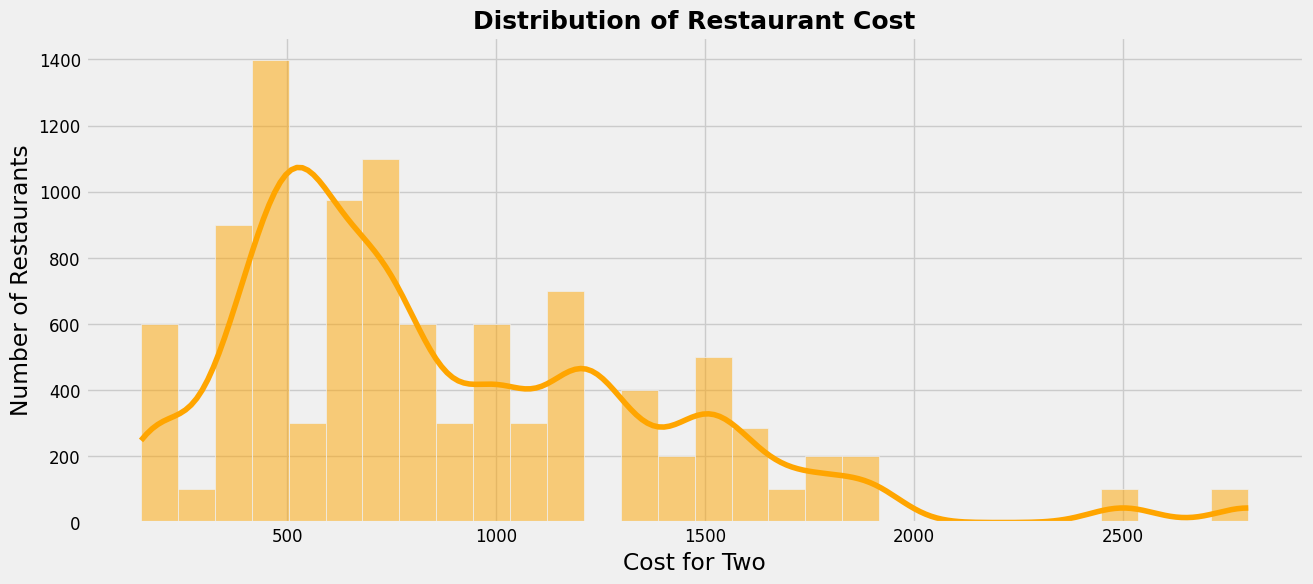

In [31]:
# Chart - 1 visualization code
# Set figure size
plt.figure(figsize=(14, 6))
# Create histogram
sns.histplot(merged_df['Cost'], bins=30, kde=True, color='orange')
# Add title and labels
plt.title('Distribution of Restaurant Cost', fontsize = 18, fontweight = 'bold')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Restaurants')
# Set x and y ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show grid
plt.grid(True)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is particularly suited to represent the distribution of numerical data such as restaurant prices. It is useful in achieving the range, midpoint, and skewness of cost data, and it will be useful for customer decision-making purposes and pricing strategy.

##### 2. What is/are the insight(s) found from the chart?

The histogram can perhaps illustrate that the majority of restaurants fall into a certain cost range (under ₹500 range). That illustrates the most frequent cost band where most restaurants are locating themselves and reflects the affordability trend of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Enables new or existing restaurants to locate themselves competitively by aiming for the most frequent cost band so as to reach the most people.

**Negative Insight:**

If there is a high fall-off in the higher-priced cost bands, it can indicate that fine dining restaurants are not capable of attracting volume, indicating a gap or mismatch between price and value perception.

#### Chart - 2 : Top 10 Most Frequent Cuisines

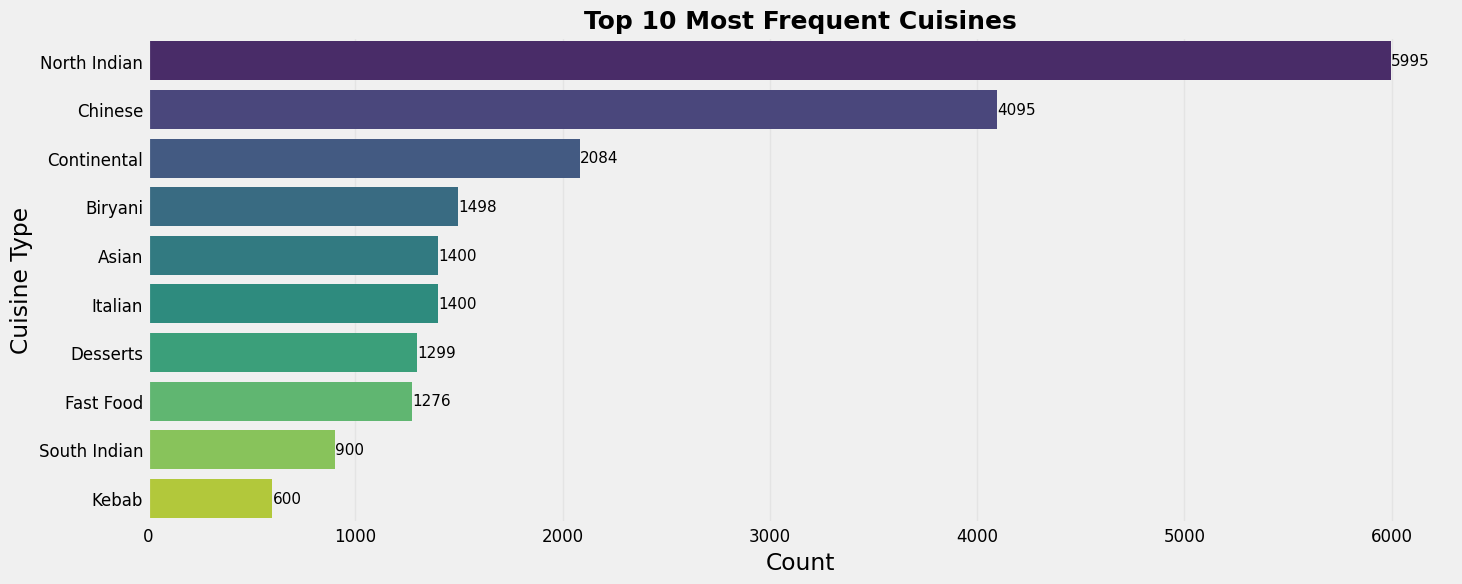

In [32]:
# Chart - 2 visualization code
# Importing counter from collection library
from collections import Counter
# Flatten and count cuisines
all_cuisines = merged_df['Cuisines'].str.split(', ').sum()
cuisine_counts = Counter(all_cuisines).most_common(10)

cuisines, counts = zip(*cuisine_counts)
# Create bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=counts, y=cuisines, palette='viridis')
# Add title and label
plt.title('Top 10 Most Frequent Cuisines', fontsize = 18, fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
# Set x and y ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add data labels
for index, value in enumerate(counts):
    plt.text(value + 1, index, str(value), va='center', fontsize = 11)
# Set grid
plt.grid(axis='x', alpha=0.3)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is an effective way to present the cuisines at top in terms of frequency. With it, we can contrast visually various forms of cuisines at a glance and base food offering decision-making on customer choice.

##### 2. What is/are the insight(s) found from the chart?

We can see that cuisines such as North Indian, Chinese, and South Indian are the most common. This is due to high customer demand for such cuisines and indicates the food with the largest market share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

New restaurant businesses can keep up with popular cuisines in a bid to achieve increased customer traction. It can further inform current restaurants in the process of menu formulation.

**Negative Insight:**

Over-saturation with one cuisine can increase competition, with new players finding it harder to differentiate themselves unless they innovate.

#### Chart - 3 : Top 10 Collections

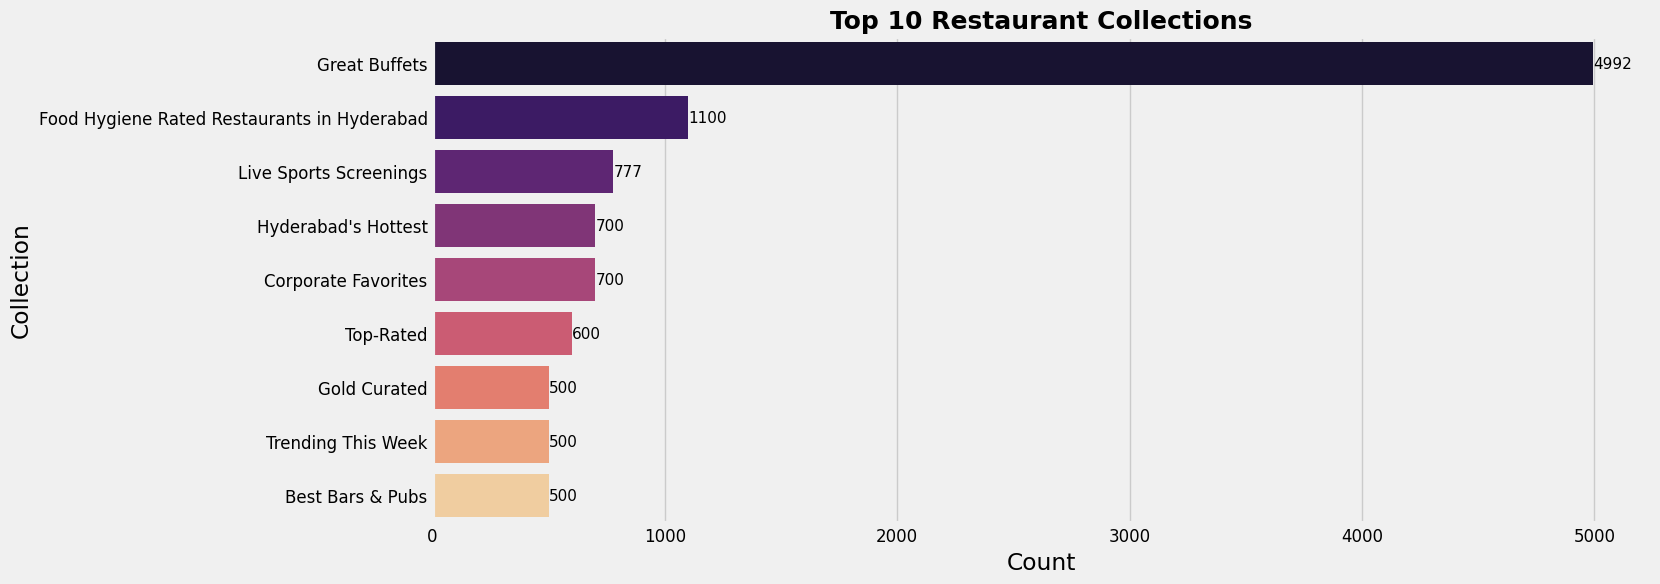

In [33]:
# Chart - 3 visualization code
# Flatten and count collections
all_collections = merged_df['Collections'].dropna().str.split(', ').sum()
collection_counts = Counter(all_collections).most_common(10)

collections, col_counts = zip(*collection_counts)
# Filter out "Not Available" records from this chart
collections = [collection for collection in collections if collection != 'Not Available']
col_counts = [count for count, collection in zip(col_counts, collections) if collection != 'Not Available']
# Create barplot
plt.figure(figsize=(14, 6))
sns.barplot(x=col_counts, y=collections, palette='magma')
# Add title and labels
plt.title('Top 10 Restaurant Collections', fontsize = 18, fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Collection')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add data labels
for i, v in enumerate(col_counts):
    plt.text(v + 1, i, str(v), va='center', fontsize = 11)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Collections are restaurant categories (i.e., Buffet, Romantic Dining). A bar chart follows how often these collections match restaurants and determines market position.

##### 2. What is/are the insight(s) found from the chart?

Consumers enjoy variety (buffets) and cleanliness (hygiene-rated restaurants), suggesting a movement towards value-for-money eating and health-conscious decision-making.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Businesses can modify their products by offering buffets or hygiene items so that more people visit.
* Advertisements for hygiene or buffets can increase visibility and credibility.
* Promotes innovation in menu and meal format to maintain pace with consumers.

**Negative Insight:**

* Growing competition in these segments may make it difficult to differentiate.
* Over-emphasis on these might indicate the neglect of other unique characteristics that include regional food or fine dining.

#### Chart - 4 : Restaurant Ratings Distribution

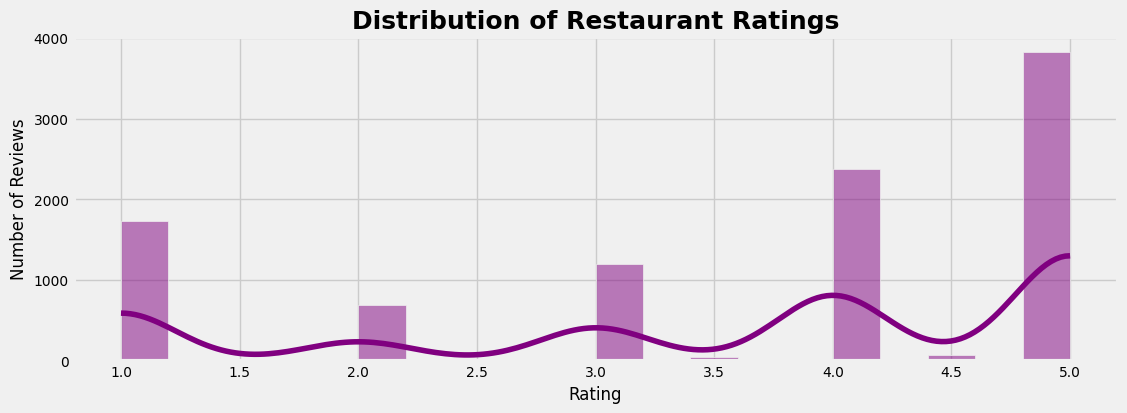

In [130]:
# Chart - 4 visualization code
# Create hisplot
plt.figure(figsize=(12, 4))
sns.histplot(merged_df['Rating'], bins=20, color='purple', kde=True)
# Add title and label
plt.title('Distribution of Restaurant Ratings', fontsize = 18, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

We plotted the restaurant rating distribution using a histogram with KDE. We selected this chart because it is easy to identify the frequency of ratings by ranges from it, and the KDE line indicates the trend of the underlying distribution (i.e., if it is skewed, normal, or uniform).

##### 2. What is/are the insight(s) found from the chart?

1. Highest density of ratings is between 4.0 and 5.0 and the most frequent rating is 5.0, indicating that there are a lot of restaurants that are rated flawlessly.

2. There are fewer than 3.0 ratings, which means that low-scoring restaurants would be delisted or get less ratings.

3. The curve shows positive skewness—there are more ratings on the higher side, which is the sign of overall satisfactory customers.

4. Then there is a decline in 2.5 to 3.5 clearly indicating that the customers are not willing to provide average ratings or restaurants do not favor this middle ground.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**

The best ratings (4.0 - 5.0) indicate customer satisfaction, and Zomato can utilize it to feature top-rated restaurants, develop user trust, and promote them with featured listings or loyalty programs.

**Negative Insight-**

Too much high ratings dilute differentiation and it becomes harder to find stand-out places. It might also call into question the reliability of ratings and lower visibility for lower-rated or newer establishments.

#### Chart - 5 : Sentiment Label Counts

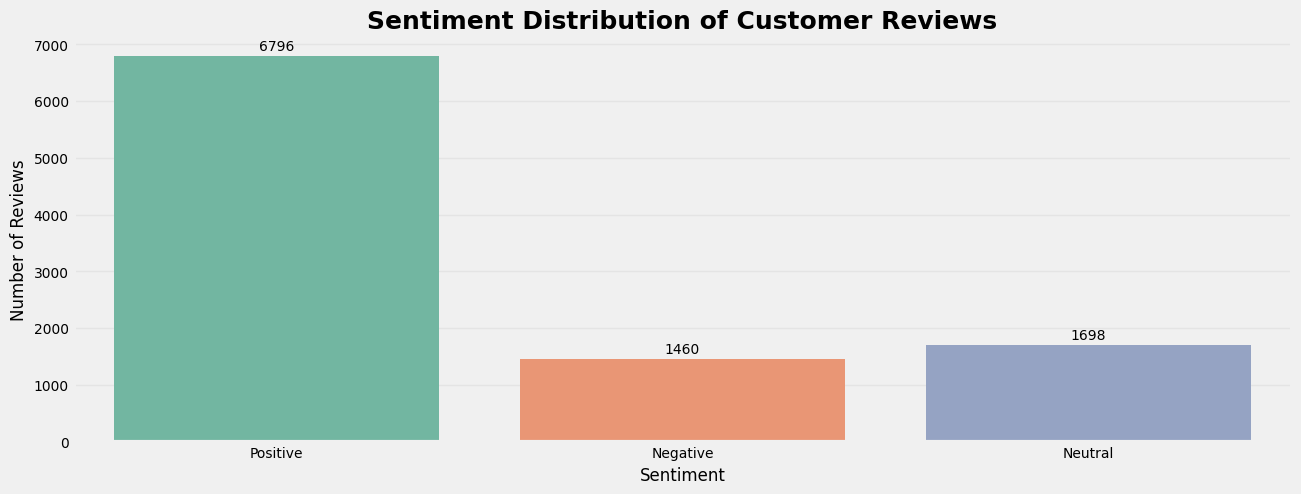

In [35]:
# Chart - 5 visualization code
# Create countplot
plt.figure(figsize=(14, 5))
ax = sns.countplot(data=merged_df, x='Sentiment_Label', palette='Set2')
# Add title and labels
plt.title('Sentiment Distribution of Customer Reviews', fontsize = 18, fontweight = 'bold')
plt.xlabel('Sentiment', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, int(height),
            ha='center', va='bottom', fontsize=10)
# Set grid opacity
plt.grid(axis = 'y', alpha = 0.3)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is the most appropriate for comparing categories such as Positive, Neutral, and Negative sentiments. It is useful in aggregating customer review emotional tone.

##### 2. What is/are the insight(s) found from the chart?

The chart can illustrate most reviews are Positive, fewer of Neutral, and fewer Negative ones. It informs us of customer satisfaction at scale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Positive sentiment dominance is a strong indicator of brand health and customer satisfaction, which aids in marketing and investor confidence.

**Negative Insight:**

Perceptible proportion of negative opinions may indicate service problems or unmet expectations. This can undermine customer retention if not answered quickly.

#### Chart - 6 : Sentiment Score Distribution

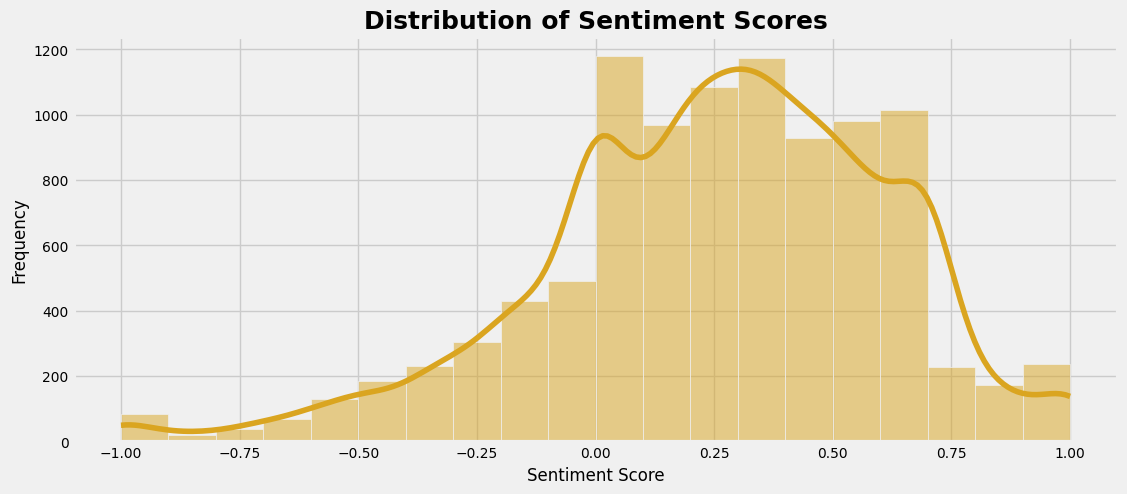

In [36]:
# Chart - 6 visualization code
# Create histplot
plt.figure(figsize=(12,5))
sns.histplot(merged_df['Sentiment_Score'], bins=20, kde=True, color='goldenrod')
# Add title and labels
plt.title('Distribution of Sentiment Scores', fontsize = 18, fontweight = 'bold')
plt.xlabel('Sentiment Score', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()



##### 1. Why did you pick the specific chart?

This KDE line with histogram reveals the distribution of the sentiment scores that are obtained from the customer feedback. They are between -1 (least positive) and +1 (least negative). The curve tells us the distribution of these scores across the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. Most of the sentiment scores range from 0 to 0.6, indicating most of the reviews are somewhat to very positive.

2. There are fewer negative sentiment scores below 0, indicating fewer negative sentiments.

3. It is right-skewed, also confirming a general tendency of customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Customers are usually satisfied with their restaurant experience.
* It builds confidence for new customers.
* Restaurants with positive overall sentiment can be featured in recommendations or campaigns.

**Negative Insight:**
* There are some very low sentiment scores (close to -1) that represent very poor experiences that need to be addressed.
* Businesses need to analyze such negative instances to improve service and reduce dissatisfaction in the future.


### **Bivariate Analysis**

#### Chart - 7 : Top 10 Cuisines by Average Rating

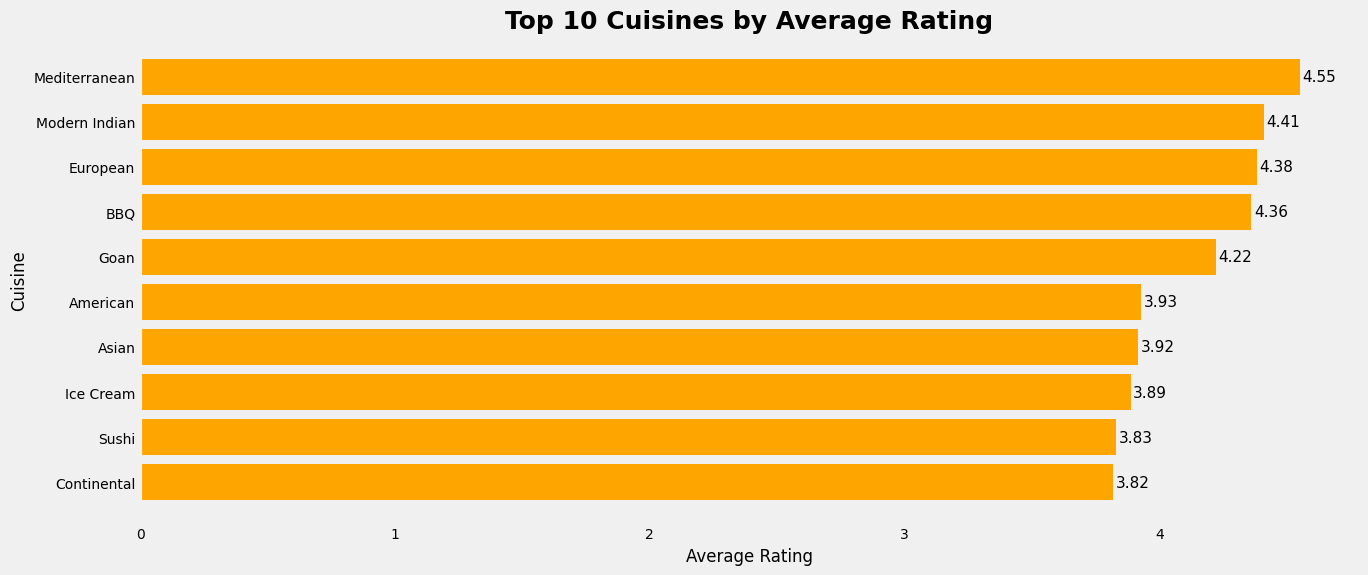

In [37]:
# Chart - 7 visualization code
# Find unique cuisines
unique_cuisines = merged_df['Cuisines'].str.split(', ').explode().unique()
# Calculate average rating for each cuisine
average_ratings = []
for cuisine in unique_cuisines:
    average_rating = merged_df[merged_df['Cuisines'].str.contains(cuisine)]['Rating'].mean()
    average_ratings.append((cuisine, average_rating))
# Plot top 10 unique cuisine by average rating
average_ratings.sort(key=lambda x: x[1], reverse=True)
top_10_cuisines = average_ratings[:10]
# Create horizontal bar plot
plt.figure(figsize=(14, 6))
plt.barh([cuisine[0] for cuisine in top_10_cuisines], [cuisine[1] for cuisine in top_10_cuisines], color='orange')
# Sort chart by highest to lowest
plt.gca().invert_yaxis()
# Add title and labels
plt.title('Top 10 Cuisines by Average Rating', fontsize = 18, fontweight = 'bold')
plt.xlabel('Average Rating', fontsize = 12)
plt.ylabel('Cuisine', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Add data labels
for index, value in enumerate(top_10_cuisines):
    plt.text(value[1] + 0.01, index, str(round(value[1], 2)), va='center', fontsize = 11)
# Show grid
plt.grid(False)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was the preferred one since it is the ideal way of presenting categorical data (cuisines) and their average ratings in descending order so that side-by-side comparison of the values becomes possible.

##### 2. What is/are the insight(s) found from the chart?

The graph indicates strong average ratings of 4.55 and above for Mediterranean, followed by Modern Indian (4.41) and European (4.38). This is an indication of high value for and high positive rating of these cuisines by customers. It is an indication of appreciation of unusual, premium, or maybe healthier versions of cuisine compared to more popular ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Restaurants are able to leverage such highly-rated food (particularly Mediterranean and Modern Indian) to pull in a higher quality of customers. Introduction or marketing of such foods can translate into increased customer satisfaction, rating, and advantage for restaurant reputation—particularly in competitive markets.

**Negative Insight:**

The only potential down-side is that popular foods such as North Indian or Chinese may not appear in the top 10 based on ratings, which would imply that they were perhaps over-saturated or they did not have consistency in quality. This would negatively affect restaurants that serve only standard cuisines because they may not be able to maintain good customer ratings if their quality cannot be managed or if customer taste changes to niche cuisines.

#### Chart - 8 : Rating vs. Sentiment Score

In [38]:
# Correlation coefficient for rating v/s sentiment score
correlation = merged_df['Rating'].corr(merged_df['Sentiment_Score'])
print(f"Correlation coefficient between Rating and Sentiment Score: {correlation}")

Correlation coefficient between Rating and Sentiment Score: 0.6945504725230113


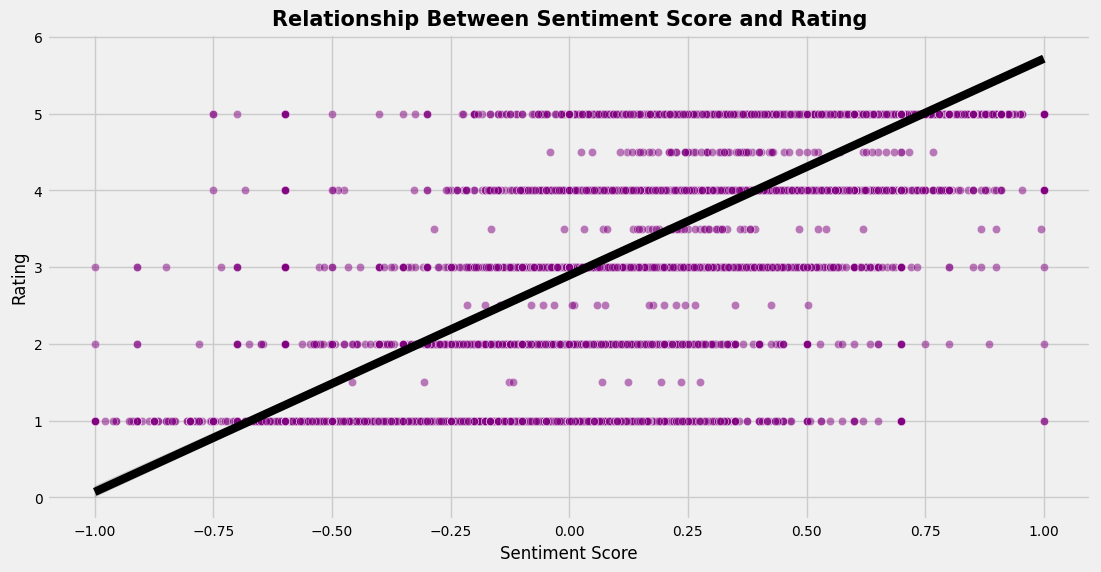

In [39]:
# Chart - 8 visualization code
# Create scatter plot with regression line
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Sentiment_Score', y='Rating', alpha=0.5, color='purple')
sns.regplot(data=merged_df, x='Sentiment_Score', y='Rating', scatter=False, color='black')
# Add title and label
plt.title('Relationship Between Sentiment Score and Rating', fontsize=15, weight='bold')
plt.xlabel('Sentiment Score', fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

This scatter plot of the regression line illustrates the relationship between sentiment scores (text reviews) and rating scores. It is intended to confirm the extent to which textual comments are associated with the rating scores.

##### 2. What is/are the insight(s) found from the chart?

There is a definite positive relationship - as sentiment scores increase, so do ratings. This indicates that positive text reviews tend to correlate with more high star ratings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

This confirms that sentiment analysis models actually do work — companies are able to use automated sentiment scoring as a trusty measure of customer happiness.

**Negative insight:**

There is a small amount of variation around neutral scores to demonstrate that ratings won't always match review tone, possibly due to rating bias or review sarcasm.


#### Chart - 9 : Cost vs. Rating

In [48]:
# Correlation coefficient for Cost v/s Rating
correlation = merged_df['Cost'].corr(merged_df['Rating'])
print(f"Correlation coefficient between Cost and Rating: {correlation}")

Correlation coefficient between Cost and Rating: 0.1441193580694096


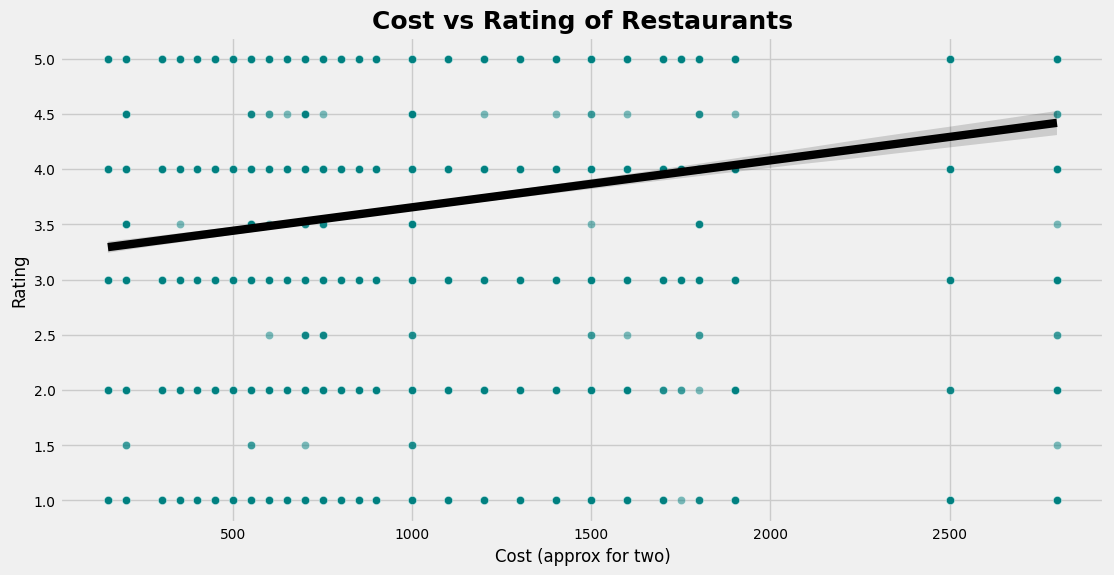

In [50]:
# Chart - 9 visualization code
# Create scatter plot with regression line
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Cost', y='Rating', alpha=0.5, color='teal')
sns.regplot(data=merged_df, x='Cost', y='Rating', scatter=False, color='black')
# Add title and label
plt.title('Cost vs Rating of Restaurants', fontsize=18, weight='bold')
plt.xlabel('Cost (approx for two)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is best to determine the relationship between two continuous numerical variables here, restaurant cost of two and restaurant rating. It can be used to see how levels of cost might relate to perceived quality or satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that there is a low positive correlation between rating and price. In other words, restaurants that are more expensive will have slightly higher ratings, but this is not very much so. There are lots of moderately priced restaurants with excellent grades as well, which demonstrates that quality does not necessarily translate to cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

This helps the businesses to realize that premium pricing has nothing to do with premium ratings, but somewhat premium prices can be associated with higher quality. This can be used to inform positioning and pricing strategy—e.g., middle-range price with high-end quality still translates to wonderful customer ratings.

**Negative Insight:**

Poor correlation indicates that charging premium but not pairing it with quality or service can result in lower ratings. People may expect something more from expensive restaurants, and not being able to provide it may mean dissatisfaction, both repeat business as well as ratings.

#### Chart - 10 : Follower Count vs. Rating

In [51]:
# Correlation coefficient for Follower Count v/s Rating
correlation = merged_df['Follower_Count'].corr(merged_df['Rating'])
print(f"Correlation coefficient between Follower Count and Rating: {correlation}")

Correlation coefficient between Follower Count and Rating: 0.03563757618024837


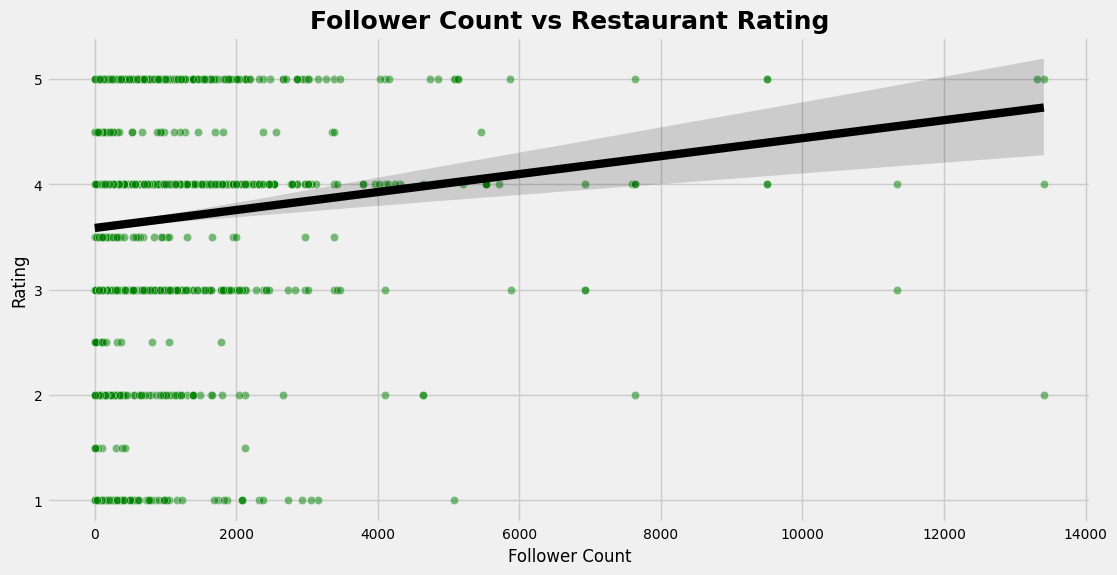

In [52]:
# Chart - 10 visualization code
# Create scatter plot with regression line
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Follower_Count', y='Rating', alpha=0.5, color='green')
sns.regplot(data=merged_df, x='Follower_Count', y='Rating', scatter=False, color='black')
# Add title and label
plt.title('Follower Count vs Restaurant Rating', fontsize=18, weight='bold')
plt.xlabel('Follower Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the appropriate one to examine the relationship between two continuous variables. Here, it shows a pattern or correlation between a restaurant's number of followers (measure for popularity or visibility) and its rating (measure of perceived quality).


##### 2. What is/are the insight(s) found from the chart?

The correlation is a weak and insignificant positive correlation between the rating and the followers. It indicates that restaurants with more followers are not necessarily rated higher. The scatter plot likely shows a random spread of data points without a clear trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

This makes companies realize that growth in followers alone will not provide the boost to ratings. Restaurants must work towards the quality of service, dining experience, and customer satisfaction that go directly into determining ratings. Followers can assist with exposure but probably not reputation.


**Negative Insight:**

Over-dependency on follower growth (for instance, with the help of ads or influencer collaborations) at the cost of quality can be catastrophic. Huge followers with low ratings can malign one's credibility since customers might feel deceived or disappointed. A large gap between popularity and quality can harm long-term customer trust.

#### Chart - 11 : Review Count vs. Rating

In [53]:
# Correlation coefficient for Review Count v/s Rating
correlation = merged_df['Review_Count'].corr(merged_df['Rating'])
print(f"Correlation coefficient between Review Count and Rating: {correlation}")

Correlation coefficient between Review Count and Rating: 0.035253631591280046


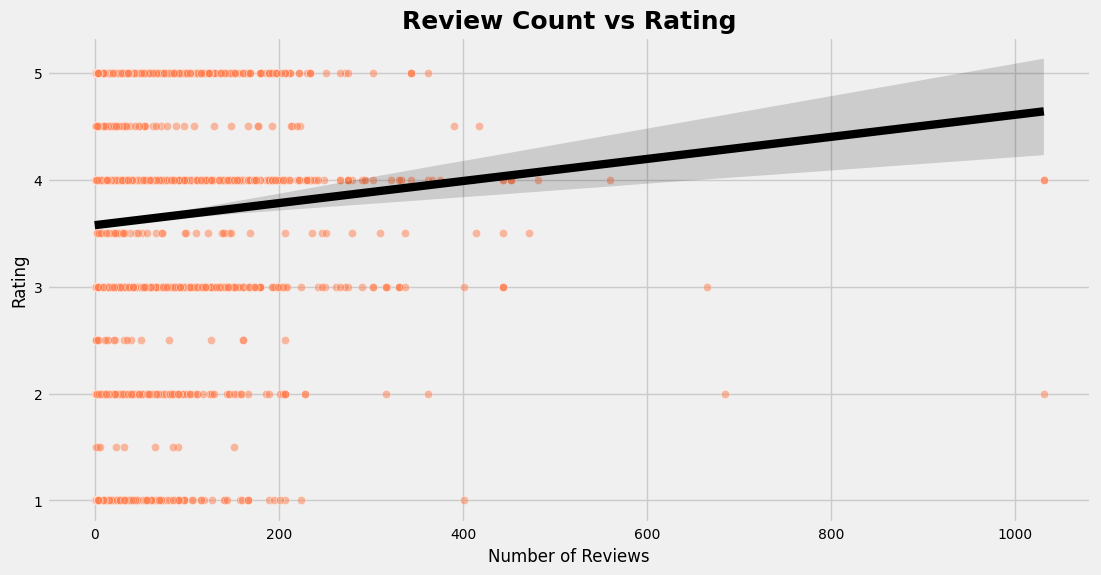

In [55]:
# Chart - 11 visualization code
# Create scatter plot with regression line
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Review_Count', y='Rating', alpha=0.5, color='coral')
sns.regplot(data=merged_df, x='Review_Count', y='Rating', scatter=False, color='black')
# Add title and label
plt.title('Review Count vs Rating', fontsize=18, weight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is particularly good to explore the association between two quantitative variables here, Review_Count and Rating. It graphically displays the distribution and potential association between the rate at which a restaurant is reviewed and how it is rated.

##### 2. What is/are the insight(s) found from the chart?

The plot indicates weak positive correlation. This means restaurants with more review counts have not necessarily higher ratings, and restaurants with fewer review counts have not necessarily lower ratings. The points are spread way apart, confirming that there is no strong linear relationship.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

This insight can lead companies not to depend on review volume as a measure of quality. Rather, they need to concentrate on quality customer experience in order to generate good ratings irrespective of review volume. Also, interaction with fewer high-impact reviews can prove to be more useful than chasing quantity.


**Negative Insight:**

A false assumption that more reviews lead to high ratings can cause restaurants to focus on promotion gimmicks in order to boost review numbers rather than making service or food quality better. This can fail if reviews rise but ratings do not, impacting business reputation.

### **Multivariate Analysis**

#### Chart - 12 : Sentiment Score vs Rating by Cuisine

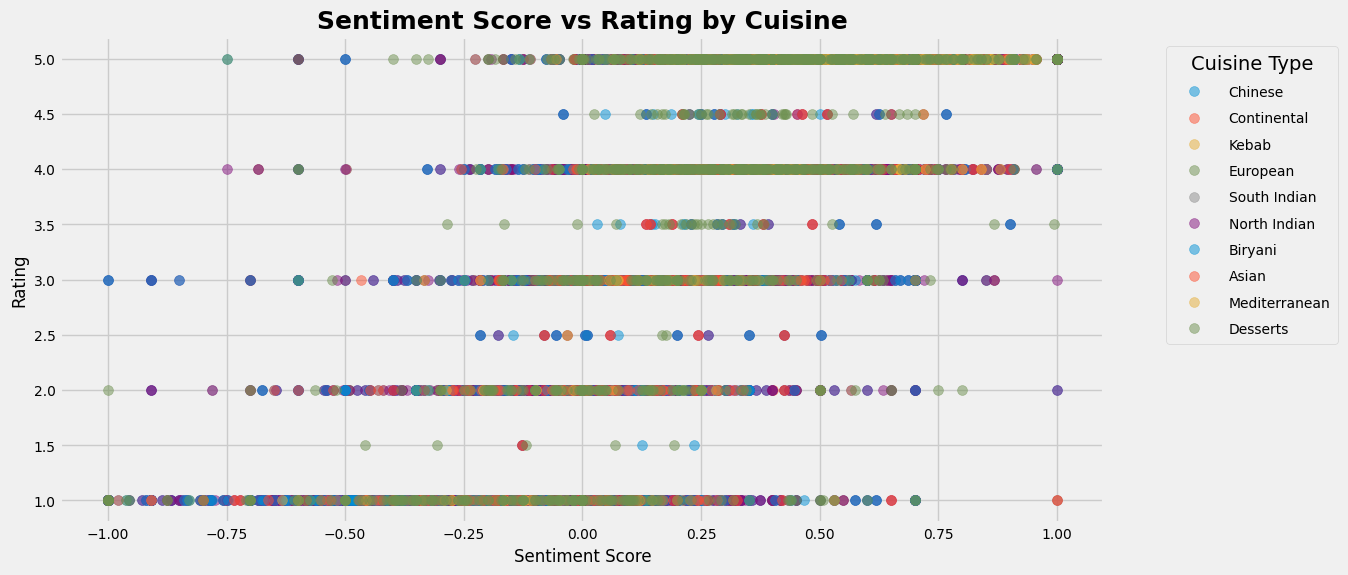

In [93]:
# Chart - 12 visualization code
# Find top 10 unique cuisine
unique_cuisines = merged_df['Cuisines'].str.split(', ').explode().unique()[:10]
# Create scatter plot
plt.figure(figsize=(12, 6))
for cuisine in unique_cuisines:
    cuisine_data = merged_df[merged_df['Cuisines'].str.contains(cuisine)]
    plt.scatter(cuisine_data['Sentiment_Score'], cuisine_data['Rating'], label=cuisine, alpha=0.5, s = 50)
# Add title and label
plt.title('Sentiment Score vs Rating by Cuisine', fontsize=18, weight='bold')
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show legend
for text in plt.legend(title = 'Cuisine Type', title_fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left').get_texts():
    text.set_fontsize(10)
# Show grid
plt.grid(True)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot has been used because it shows the rating-sentiment score relationship, and the hue parameter adds another dimension by displaying how the various cuisines are spread over that relationship. The multivariate visualization enables pattern spotting among cuisines and whether some cuisines are better rated or have a better sentiment score at all times.

##### 2. What is/are the insight(s) found from the chart?

1. Sentiment rating and score are positively correlated — as sentiment scores increase, ratings also rise.

2. Certain cuisines such as European, Modern Indian, and Mediterranean are grouped in the upper-right quadrant, meaning high sentiment scores and high ratings.

3. Others such as Chinese or North Indian are dispersed, which means muddled public perception and experience.

4. These trends indicate some cuisines are always delivering, while others could be more divisive.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* Restaurants can target leading cuisines with high rating and high sentiment as a benchmark.
* For new businesses, investing in cuisines such as European or Mediterranean could be fruitful based on continuous customer satisfaction.

**Negative Insight:**
* Highly fluctuating sentiment and rating cuisines, e.g., Chinese, can reflect uneven quality or service. If not addressed, it could result in dissatisfaction among customers and bad reviews.
* Identifying above issues at an early stage enables targeted improvement in menu, service, or branding strategies.

#### Chart - 13 : Cost vs Rating by Sentiment Label

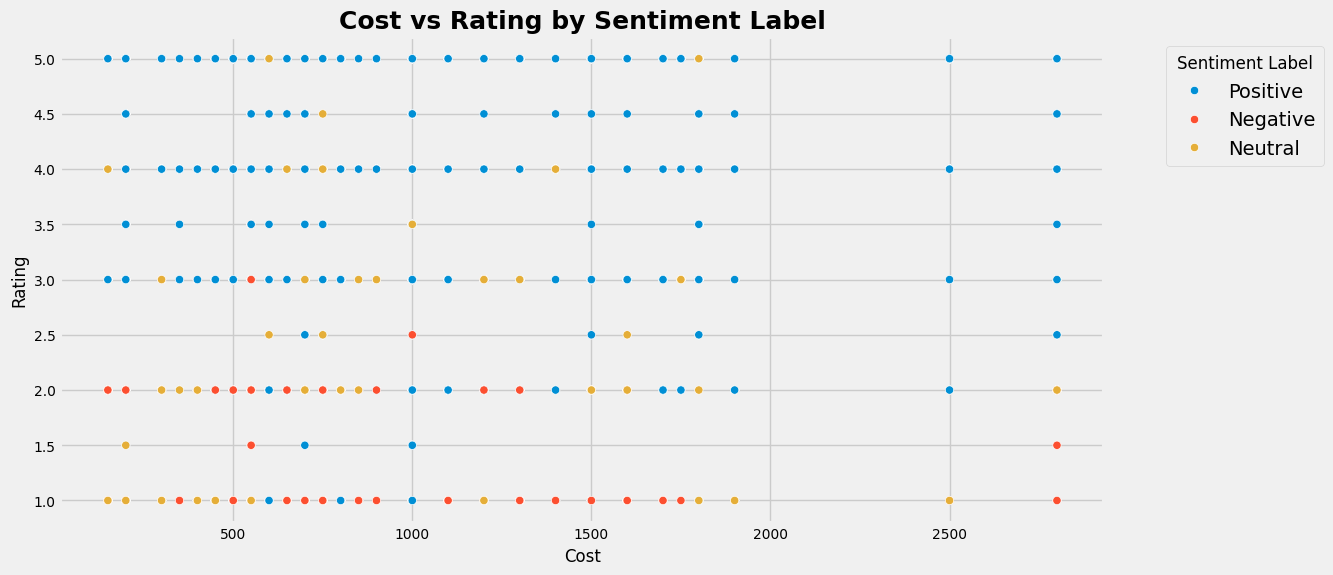

In [99]:
# Chart - 13 visualization code
# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Cost', y='Rating', hue='Sentiment_Label', data=merged_df)
# Add title and label
plt.title('Cost vs Rating by Sentiment Label', fontsize=18, weight='bold')
plt.xlabel('Cost', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Add legend
plt.legend(title = 'Sentiment Label', title_fontsize = 12, bbox_to_anchor=(1.05, 1), loc='upper left')
# Show grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

This scatter plot allows exploration of how rating depends on cost and if customer sentiment affects this relationship. Adding hue with sentiment label introduces a categorical aspect to the analysis.

##### 2. What is/are the insight(s) found from the chart?

The plot shows high-rated restaurants across all price levels but that the majority of high-rated restaurants are low-to-mid priced with positive sentiment. There is not as much negative sentiment with high ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

In reality, it highlights the importance of low-cost good service, as it is linked with high sentiment and rating.

**Negative Insight:**

A negative insight is that high cost does not necessarily translate to high ratings if sentiment is low.

#### Chart - 14 : Boxplot - Rating by Sentiment Label

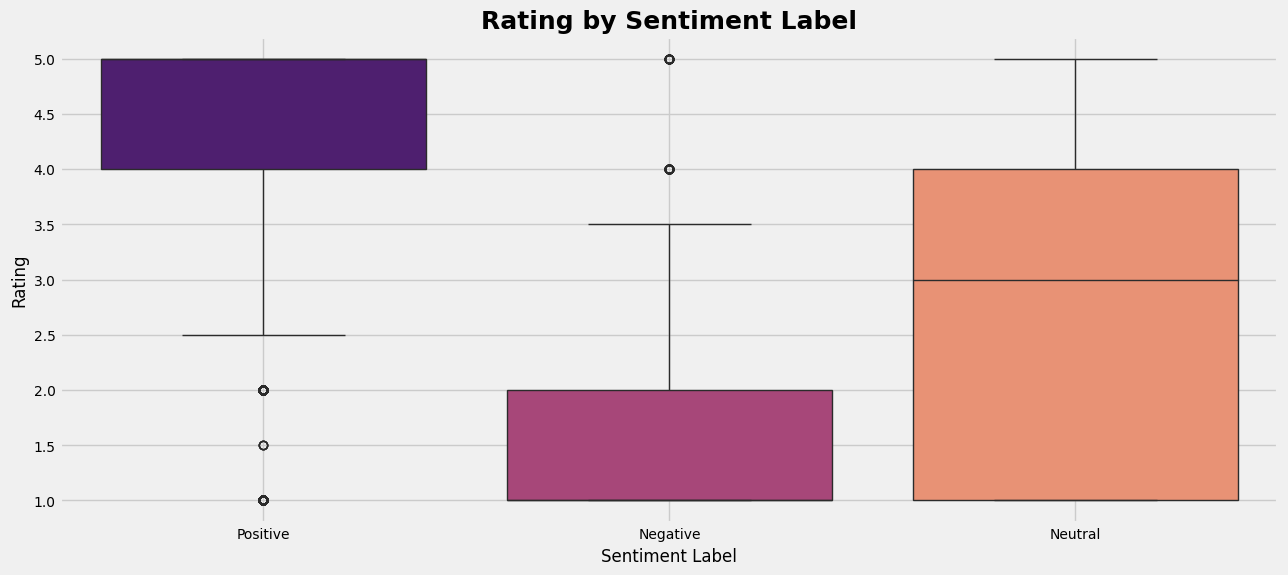

In [102]:
# Chart - 14 visualization code
# Create box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Sentiment_Label', y='Rating', data=merged_df, palette = 'magma')
# Add title and label
plt.title('Rating by Sentiment Label', fontsize=18, weight='bold')
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Boxplots are ideal to compare distribution, median, and outliers in ratings by sentiment labels, providing a complete view of spread and consistency.


##### 2. What is/are the insight(s) found from the chart?

Positive sentiment reviews correlate with greater ratings with less spread, while negative sentiment reviews correlate with lesser ratings with greater spread.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

The insight will be able to make restaurants aware of customer satisfaction maintenance.

**Negative Insight:**

A potential negative influence is exposed in low-rated restaurants with negative sentiment directed towards improving quality or service.

#### Chart - 15 : Violin Plot - Rating Distribution by Collection Popularity

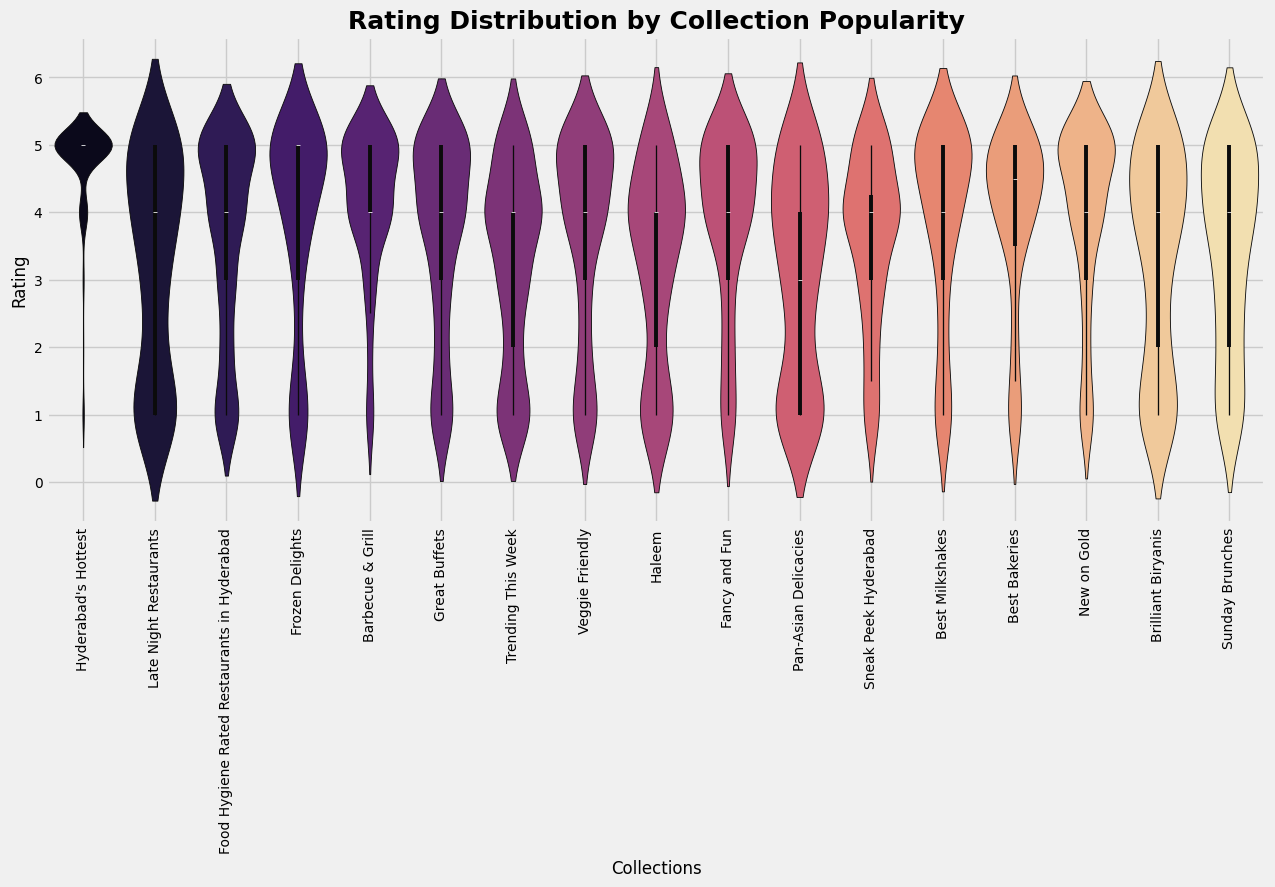

In [118]:
# Chart - 15 visualization code
# Find unique collections
unique_collections = merged_df['Collections'].str.split(', ').explode().unique()
# Filter "Not Available" records
unique_collections = [collection for collection in unique_collections if collection != 'Not Available']
# Create violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(x='Collections', y='Rating', data=merged_df[merged_df['Collections'].isin(unique_collections)], palette = 'magma')
# Add title and label
plt.title('Rating Distribution by Collection Popularity', fontsize=18, weight='bold')
plt.xlabel('Collections', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10)
# Show grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

The violin plot shows both the distribution and density of favorite restaurant collections' ratings and is thus best used to analyze variability and concentration of ratings.


##### 2. What is/are the insight(s) found from the chart?

1. Collections like "Brilliant Biryanis", "Sunday Brunches", and "New on Gold" have a high average rating with a high concentration, i.e., great customer reviews all the time. Such sets are bound to be top-rated and customer-loved.

2. "Hyderabad's Hottest" has a high and high rating distribution, showing excellent rating consistency. That is, it is a highly reliable set with minimal user satisfaction variation.

3. Collections such as "Late Night Restaurants", "Frozen Delights", and "Pan-Asian Delicacies" possess broader distributions with a mix of high and low ratings. This indicates varied experiences in restaurants within these collections, which might require quality control or better curating.

4. Some collections such as "Best Milkshakes" and "Sneak Peek Hyderabad" have lower median ratings and a skew towards the lower side, indicating overall less satisfaction on the customers' end and room for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Companies can spot and target collections with consistent high ratings for reputation for the brand.

**Negative Insight:**

High variation collections would require additional quality control to prevent customer letdown.

#### Chart - 16 : Barplot - Average Cost per Sentiment Label

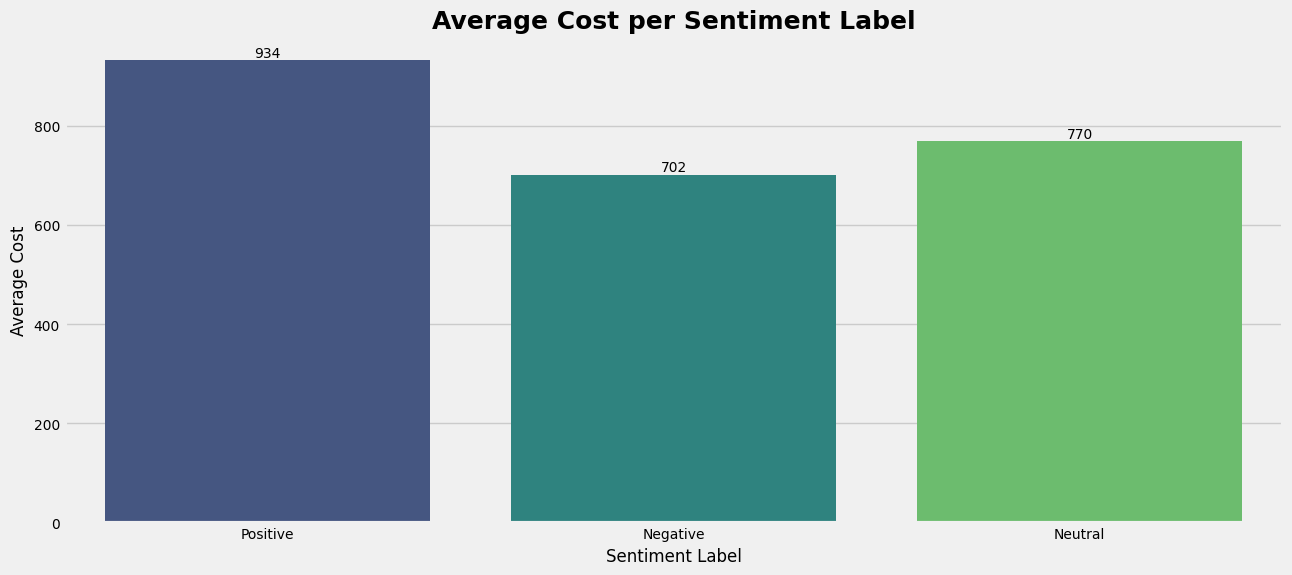

In [129]:
# Chart - 16 visualization code
# Barplot – Average Cost per Sentiment Label
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Sentiment_Label', y='Cost', data=merged_df, palette = 'viridis', ci = False)
# Add title and label
plt.title('Average Cost per Sentiment Label', fontsize=18, weight='bold')
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Average Cost', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
# Show plot
plt.show()



##### 1. Why did you pick the specific chart?

A barplot is useful for comparing numeric means between categorical variables. In this case, it shows the average cost related to varying sentiment labels.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the correlation of restaurant cost and sentiment. Well-sentimented restaurants are costly, that is, better experiences could be associated with high cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Businesses can opt for premium services and pay premium prices as long as they provide positive customer experiences.

**Negative Insight:**

Low-cost restaurants are getting more neutral or negative views, which would suggest that affordability alone doesn't ensure satisfaction.


#### Chart - 17 : Correlation Heatmap

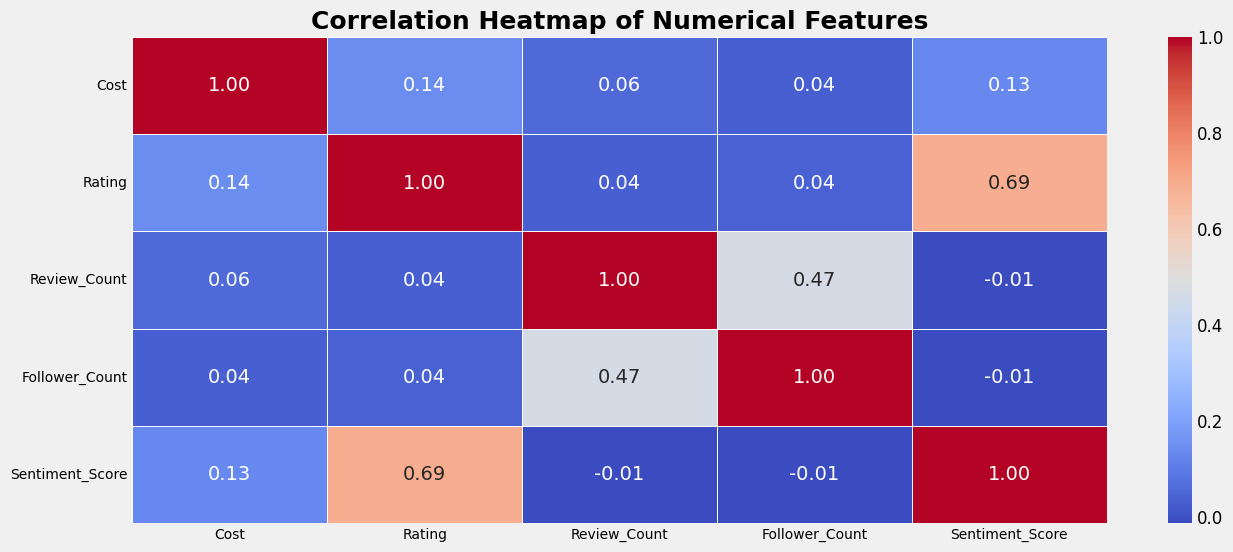

In [62]:
# Correlation Heatmap visualization code
# Finding all numerical variables
num_cols = ['Cost', 'Rating', 'Review_Count', 'Follower_Count', 'Sentiment_Score']
# Create correlation heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(merged_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Set font size for cbar
plt.gcf().axes[-1].tick_params(labelsize=12)
# Add title and label
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is the most suitable graph to visually explore linear relationships between several numeric variables by a simple glance. It enables us to see variable correlations such as Rating, Cost, Review Count, Follower Count, and Sentiment Score's strength and direction.

##### 2. What is/are the insight(s) found from the chart?

The heatmap indicates the presence of weak correlations between most of the variables. Cost is weakly correlated with Rating with low correlation. Review Count and Follower Count are weakly correlated with Rating. Sentiment Score is moderately correlated with Rating.

#### Chart - 18 : Pair Plot

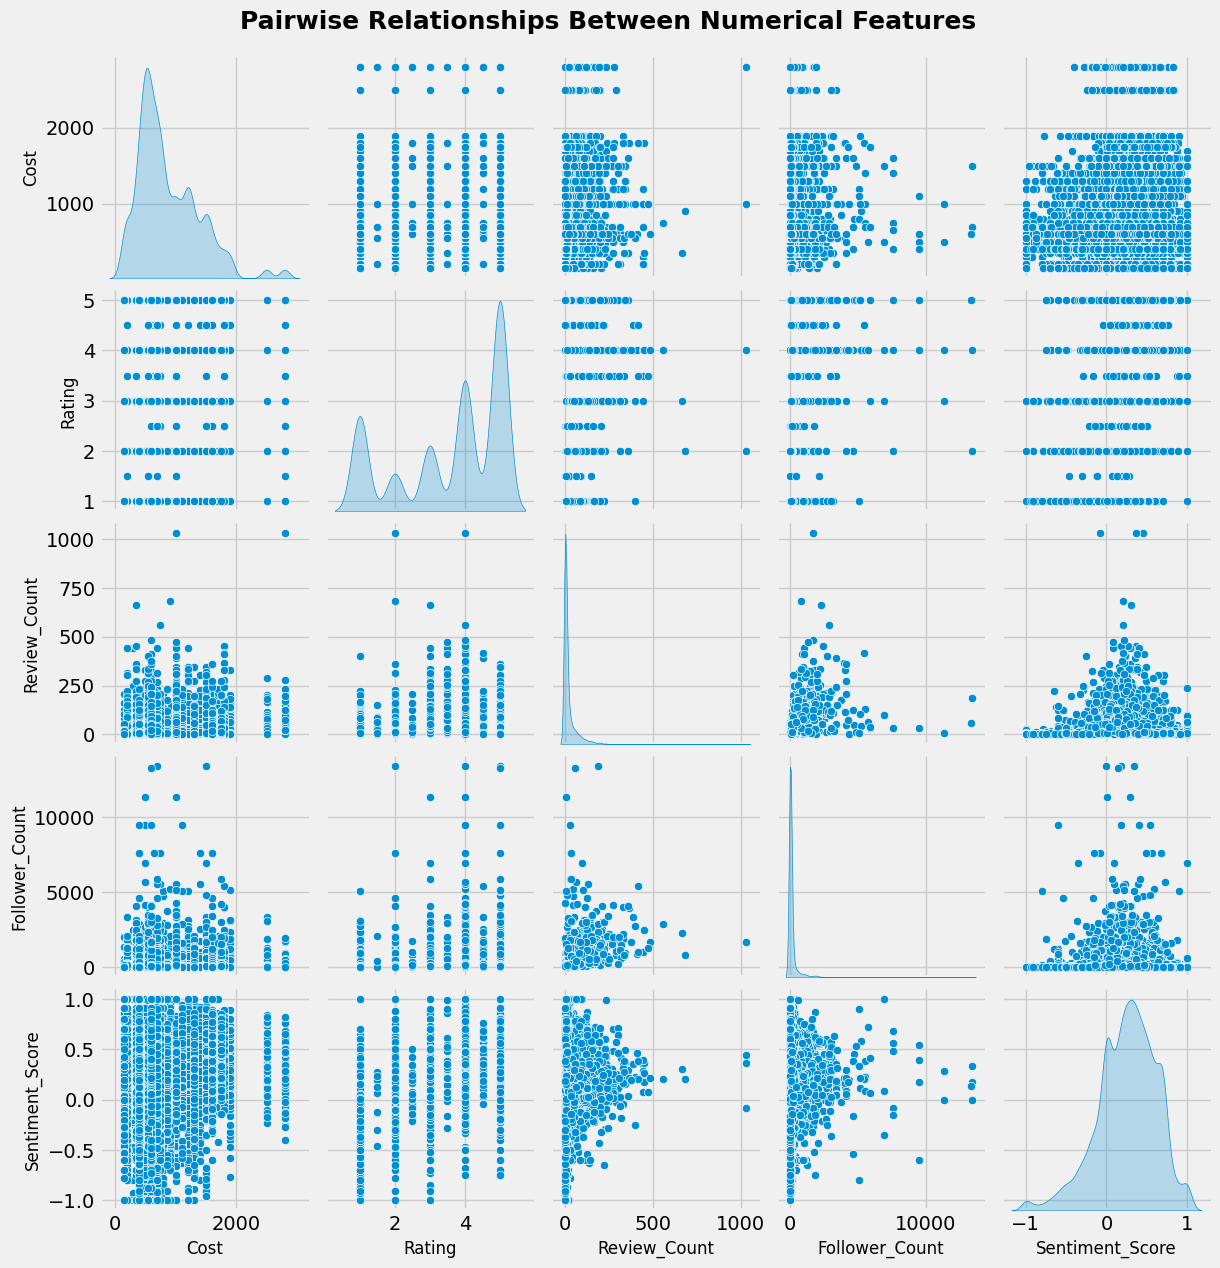

In [74]:
# Pair Plot visualization code
# Create pairplot
sns.pairplot(merged_df[num_cols], diag_kind='kde')
# Add title
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02, fontsize = 18, fontweight = 'bold')
# Set font size for x and y labels
for ax in plt.gcf().axes:
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Pairplots are useful to plot pair-wise relationship between several numerical variables. The plot is very useful to examine interaction patterns, identify trends, and verify linear or non-linear relationship as well as distributions.

##### 2. What is/are the insight(s) found from the chart?

The pairplot is consistent with weak linear correlations between variables such as Rating, Cost, Follower Count, and Review Count. Sentiment Score and Rating follow a weak increasing trend. There are outliers in cost and follower count.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the client improve customer satisfaction, restaurant visibility, and greater engagement on the site, the following actions are suggested in response to the insights from the data:

1. **Feature High-Rated Cuisine and Collections-**

Give direct marketing and homepage visibility to high-performing cuisines such as Mediterranean, Modern Indian, and European, and highest-rated collections such as "Hyderabad's Hottest" and "Brilliant Biryanis." These have a sustained high rating and positive sentiment, indicating high customer satisfaction.

2. **Improve Underperforming Areas-**

Low- and unevenly rated collection locations (e.g., "Best Milkshakes", "Pan-Asian Delights") need to be scanned for service control. Select poorly reviewed eateries from them and delist them or assist them in enhancing service.

3. **Leverage Sentiment and Review Analysis-**

Leverage sentiment scores and review counts to track customer satisfaction patterns. Emphasize restaurants with high sentiment but average rating for development opportunities and track those that have negative sentiment for intervention.

4. **Optimisation of Price Strategy-**

As cost has weak positive correlation with rating, emphasize premium restaurants offering value for money. For low-rated fine dining restaurants, evaluate whether price aligns with perceived value and adjust it.

5. **Leverage Influencers and High-Follower Users-**

Even though follower base has weak correlation with ratings, working with users with high followers will increase visibility through word-of-mouth and social proof.

6. **Emphasize Consistency and Experience-**

Collections with low rating distributions perform best. Promote restaurants to have quality, service, and ambiance in the same way consistently, which produces repeat business and loyalty.

Through this steps, client can gain credibility of the platform, enhance customer trust, and acquire long-term business.

# **Conclusion**

This project provided an in-depth analysis of Zomato restaurant data. A few key observations were made regarding cuisines, customer opinion, rating patterns, and prices. These could be utilized by companies to better service their customers, optimize offerings, and make data-driven decisions to drive visibility and engagement. This analysis as a whole is a good starting point for strategic improvement and future growth on the platform.